# 6.3 Geographic Visualization 

TABLE OF CONTENT
1. Import data and libraries
2. Data wrangling
3. Plotting a choropleth to all the listings
  3.1 Number of listings per neighbourhood
  3.2 Average Price per neighbourhood
  3.3 Availability per neighbourhood
  3.4 Accommodates per neighbourhood
4. Plotting a choropleth for Short Term listings
  4.1 Number of listings per neighbourhood for Short Term listings
  4.2 Average Price per neighbourhood for Short Term listings
  4.3 Availability per neighbourhood for Short Term listings
  4.4 Accommodates per neighbourhood for Short Term listings
5. Export Dataframes

# 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import os
import json
import folium

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create path
path = r'/Users/Dulce/Dec2024 - Airbnb Berlin'

In [4]:
# Import 'final_df'
final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_df_2.pkl'))

In [5]:
final_df.reset_index(drop=True, inplace=True)
final_df.index = range(1, len(final_df) + 1)
final_df.head()

,id,date,month,available,season,name,host_id,host_name,neighbourhood_group,neighbourhood,...,review_scores_location,review_scores_value,instant_bookable,Population,Deficit housing,rental_simple_type,price_range,accommodates_type,rental_type,review_level
1,22438,2024-01-01,January,f,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
2,22438,2024-02-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
3,22438,2024-03-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
4,22438,2024-04-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
5,22438,2024-05-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed


In [6]:
# Import ".json" file for the Berliner Neighbourhoods
kiez_geo = r'/Users/Dulce/Dec2024 - Airbnb Berlin/02 Data', 'Original Data', 'neighbourhoods.geojson'

In [7]:
geojson_path = '/Users/Dulce/Dec2024 - Airbnb Berlin/02 Data/Original Data/neighbourhoods.geojson'

# Read the GeoJSON file
with open(geojson_path, 'r') as f:
    kiez_geo = json.load(f)

# Iterating through the GeoJSON features
for feature in kiez_geo['features']:
    print(feature)

{'type': 'Feature', 'properties': {'name': 'Mitte', 'description': '', 'cartodb_id': 1, 'created_at': '2013-09-03T12:32:04+0200', 'updated_at': '2013-09-03T12:32:04+0200'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[13.403528, 52.540212], [13.404195, 52.540402], [13.404705, 52.540188], [13.405134, 52.539287], [13.405178, 52.539195], [13.405357, 52.538837], [13.405303, 52.538826], [13.405363, 52.538711], [13.405415, 52.538721], [13.405519, 52.538514], [13.405462, 52.538502], [13.405814, 52.537784], [13.405885, 52.537797], [13.406032, 52.537505], [13.406069, 52.537432], [13.406143, 52.537284], [13.406402, 52.536779], [13.406546, 52.536496], [13.406578, 52.536435], [13.406708, 52.53618], [13.406748, 52.536101], [13.406782, 52.536022], [13.406918, 52.53571], [13.407486, 52.53469], [13.408116, 52.53444], [13.40835, 52.534348], [13.408181, 52.534175], [13.407683, 52.53366], [13.407336, 52.533301], [13.407162, 52.533113], [13.406424, 52.532348], [13.406362, 52.532067], [13.406103

In [8]:
final_df.columns

Index(['id', 'date', 'month', 'available', 'season', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'license', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'property_type',
       'accommodates', 'maximum_nights', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'Population',
       'Deficit housing', 'rental_simple_type', 'price_range',
       'accommodates_type', 'rental_type', 'review_level'],
      dtype='object')

In [9]:
final_df.head()

,id,date,month,available,season,name,host_id,host_name,neighbourhood_group,neighbourhood,...,review_scores_location,review_scores_value,instant_bookable,Population,Deficit housing,rental_simple_type,price_range,accommodates_type,rental_type,review_level
1,22438,2024-01-01,January,f,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
2,22438,2024-02-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
3,22438,2024-03-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
4,22438,2024-04-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
5,22438,2024-05-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed


In [10]:
final_df.shape

(60730, 42)

In [11]:
final_df.columns

Index(['id', 'date', 'month', 'available', 'season', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'license', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'property_type',
       'accommodates', 'maximum_nights', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'Population',
       'Deficit housing', 'rental_simple_type', 'price_range',
       'accommodates_type', 'rental_type', 'review_level'],
      dtype='object')

# 2. Data wrangling 

In [12]:
# Check missing values
final_df.isna().sum()

id                                0
date                              0
month                             0
available                         0
season                            0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
license                           0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
property_type                     0
accommodates                      0
maximum_nights                    0
first_review                      0
review_scores_rating        

In [13]:
# Checking Duplicates
dups = final_df.duplicated()
dups.shape

(60730,)

No duplicates

# 3. Plotting a choropleth to all the listings

## 3.1 Number of listings per neighbourhood

In [14]:
# Count listings per neighbourhood_group
listing_counts = final_df.groupby('neighbourhood_group')['id'].count().reset_index() 
listing_counts.columns = ['neighbourhood_group', 'listing_counts']
listing_counts_sorted = listing_counts.sort_values(by='listing_counts', ascending=False)
listing_counts_sorted

,neighbourhood_group,listing_counts
6,Pankow,14080
1,Friedrichshain-Kreuzberg,13915
4,Mitte,13728
0,Charlottenburg-Wilm.,5632
9,Tempelhof - Schoeneberg,5631
5,Neukoelln,3872
8,Steglitz - Zehlendorf,1408
10,Treptow - Koepenick,1408
2,Lichtenberg,352
3,Marzahn - Hellersdorf,352


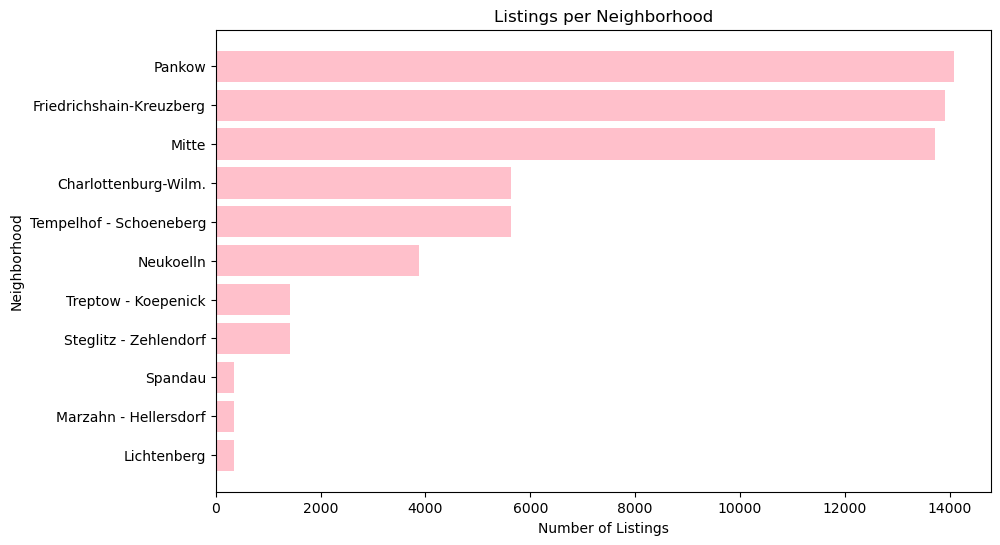

In [15]:
# Sort the DataFrame by 'listing_counts' column in descending order
listing_counts_sorted = listing_counts.sort_values(by='listing_counts', ascending=True)

# Plot the sorted horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(listing_counts_sorted['neighbourhood_group'], listing_counts_sorted['listing_counts'], color='pink')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.title('Listings per Neighborhood')
plt.show()

In [16]:
# Create a folium map at a high-level zoom
map_density = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=listing_counts.reset_index(),
    columns=['neighbourhood_group', 'listing_counts'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Listings Density'
).add_to(map_density)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(map_density)

# Display the map
map_density


In [17]:
# Save the map as an HTML file
map_density.save('map_density.html')

We see 4 main areas: 
- Friedrichshain-Kreuzberg, Mitte, Pankow: High density (Urban Hub)
- Charlottenburg-Wilm., Tempelhof - Schoeneberg: Medium Denstity (Cityscape Quarters)
- Neukoeln: Low-Density (no turist areas)
- Marzahn - Hellersdorf, Lichtenberg, Spandau, Steglitz - Zehlendorf, Treptow - Koepenick: Suburban Enclaves

The areas with high density have also a high tourist interest and include the business areas of the city. The cityscape quarters are tranquil zones which have low tourist interest but are still inside the ring (main line of metro transport). Neukoeln is a special case: There is no tourist interest, but it is well-known for the multi-cultural and nightlife interest. The demography density of this area is extremely high but it is also well connected to the rest of the city. Outside the ring, we have the rest of areas, which are the suburban enclaves. However, those areas are also well-known during the spring-summer peaks due to the lakes and green areas. Therefore, exploring the prices, availabily and room-types will be interesting.

## 3.2 Average Price per neighbourhood

In [18]:
# Average Price per neighbourhood_group
price_kiez = final_df.groupby('neighbourhood_group')['price'].mean().reset_index()
price_kiez.columns = ['neighbourhood_group', 'price']
price_kiez_sorted = price_kiez.sort_values(by='price', ascending=False)
price_kiez_sorted

,neighbourhood_group,price
8,Steglitz - Zehlendorf,134.250000
1,Friedrichshain-Kreuzberg,112.518107
4,Mitte,111.438236
6,Pankow,104.351520
2,Lichtenberg,100.000000
9,Tempelhof - Schoeneberg,92.410824
0,Charlottenburg-Wilm.,82.250000
10,Treptow - Koepenick,79.250000
5,Neukoelln,65.090909
3,Marzahn - Hellersdorf,59.000000


In [19]:
# Create a folium map at a high-level zoom
price_map = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=price_kiez,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Average Price Level'
).add_to(price_map)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(price_map)

# Display the map
price_map


In [20]:
# Save the map as an HTML file
price_map.save('price_map.html')

The area with higher average price is Steglitz - Zehlendorf, an suburban area far away of any tourist enclave and also with a low density of listings (only 1408, contrary to the more than 10.000 listings placed on the tourist areas). It is really interesting this point and also answer one of our hypothsis: 1. If a neighboughood has more tourist interest, the listing and the price will be high. Now, we can assure that this hypothesis is false: the listing density is effectively higher in the tourist and business areas, however, the prices are not. Anyways, it will be interesting to check the average price per room-type and number of accommodates.

Mitte and Friedrichshain-Kreuzberg have a high everage price, which it would be due to the tourist interest, nightlife and well bus and metro connectations. However, we see that Pankow, an area with high density of listings, has a medium-low average price level (same as Lichtenberg and Tempelhof - Schoeneberg, which had low density). The reason are the following: Pankow is outside the ring, but also it is the area were the main new buildings (also hotels and appartments) are built in the last years. It is also well-known as second or vacation homes, which are increasing the housing speculation, as we will see later.

The final insight we have here is the fact Charlottenburg-Wilm.	and Neukoeln have a low average price althogh they are districts inside the ring. Moreover, Charlottenburg-Wilm is one of the most expensive areas to live in Berlin. We will need to explore deeper why Neukoel has lower average price than Treptow - Koepenick. Probably, it will be related to the type of listings and the number of accommodates.	

## 3.3 Availability per neighbourhood

In [21]:
# Crosstab Review and Kiezs
crosstab_review_neigh = pd.crosstab(index=final_df['neighbourhood_group'],
                             columns=final_df['review_level'],
                             normalize='columns')*100
crosstab_review_neigh

review_level,Highly Reviewed,Low Reviewed,Mid Reviewed
neighbourhood_group,,,
Charlottenburg-Wilm.,2.514735,14.545455,15.790654
Friedrichshain-Kreuzberg,25.815324,21.818182,18.422430
Lichtenberg,0.000000,0.000000,2.631776
Marzahn - Hellersdorf,0.000000,0.000000,2.631776
Mitte,22.632613,21.818182,23.685981
Neukoelln,6.286837,3.636364,10.527103
Pankow,28.919450,20.000000,15.790654
Spandau,0.000000,0.000000,2.631776
Steglitz - Zehlendorf,0.000000,7.272727,0.000000


Text(0, 0.5, 'Neighbourhoods')

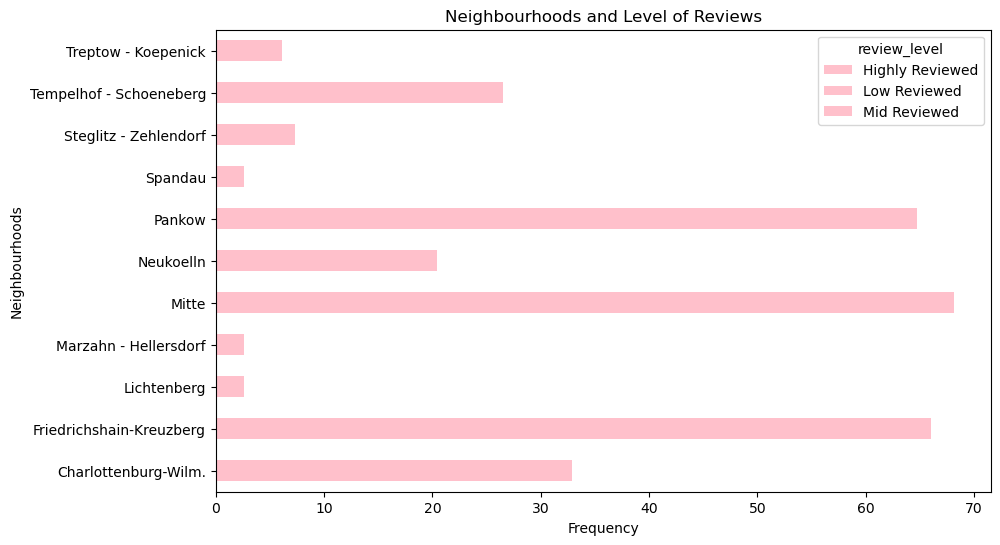

In [22]:
# Bar Chart: Review and Kiezs (100% Stacked Column)
bar_review_neigh = crosstab_review_neigh.plot.barh(stacked=True, 
                                                  title='Neighbourhoods and Level of Reviews',
                                                  color='pink', 
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Frequency')
plt.ylabel('Neighbourhoods')

In [23]:
# Average availability per neighbourhood_group
availability_kiez = final_df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
availability_kiez.columns = ['neighbourhood_group', 'availability_365']
availability_kiez_sorted = availability_kiez.sort_values(by='availability_365', ascending=False)
availability_kiez_sorted

,neighbourhood_group,availability_365
8,Steglitz - Zehlendorf,313.750000
2,Lichtenberg,285.000000
10,Treptow - Koepenick,250.250000
5,Neukoelln,209.363636
0,Charlottenburg-Wilm.,197.625000
9,Tempelhof - Schoeneberg,189.539336
3,Marzahn - Hellersdorf,177.000000
4,Mitte,135.641026
6,Pankow,132.800000
1,Friedrichshain-Kreuzberg,129.340711


In [24]:
# Create a folium map at a high-level zoom
availability_map = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=availability_kiez,
    columns=['neighbourhood_group', 'availability_365'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Availability Level'
).add_to(availability_map)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(availability_map)

# Display the map
availability_map


In [25]:
# Save the map as an HTML file
availability_map.save('availability_map.html')

We can confirm partially our hypothesis: "If the neighboughood is outside the ring, the availability will be higher". Steglitz - Zehlendorf, Lichtenberg, Treptow - Koepenick are the areas with more days availables for rent, contrary to Mitte, Pankow and Friedrichshain-Kreuzberg. However, again, Neukoeln and Charlottenburg-Wilm., which are inside the ring, have also a high availability. Another strange case is Spandau, an suburban area which seems to have the lowest availability of all.

Knowing that, we are not able to confirm our hypothesis.

## 3.4 Accommodates per neighbourhood

In [26]:
# Average accommodates per neighbourhood_group
accommodates_kiez = final_df.groupby('neighbourhood_group')['accommodates'].mean().reset_index()
accommodates_kiez.columns = ['neighbourhood_group', 'accommodates']
accommodates_kiez_sorted = accommodates_kiez.sort_values(by='accommodates', ascending=False)
accommodates_kiez_sorted

,neighbourhood_group,accommodates
2,Lichtenberg,4.000000
3,Marzahn - Hellersdorf,4.000000
4,Mitte,4.000000
9,Tempelhof - Schoeneberg,3.562422
1,Friedrichshain-Kreuzberg,3.468775
6,Pankow,3.450000
8,Steglitz - Zehlendorf,3.000000
5,Neukoelln,2.818182
10,Treptow - Koepenick,2.750000
0,Charlottenburg-Wilm.,2.562500


In [27]:
# Create a folium map at a high-level zoom
accommodates_map = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=accommodates_kiez,
    columns=['neighbourhood_group', 'accommodates'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Average of Accommodates'
).add_to(accommodates_map)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(accommodates_map)

# Display the map
accommodates_map


In [28]:
# Save the map as an HTML file
accommodates_map.save('accommodates_map.html')

It is interesting to see how the average of accommodates are for Couples (2ppl) or Families (between 3 and 5ppl). Spandau seems to be the ares with less averange of accommodates per listing. However, Lichtenberg, Marzahn - Hellersdorf and Mitte seems to be high (4). It is interesting how Mitte has so high number of accommodates according with the average size of the appartments (contrary to the other areas). 

# 4. Plotting a choropleth for Short Term Listings

### Analysis before Subsetting

In [29]:
# Count of Room Types 
room_type = final_df.groupby('room_type')['id'].count().reset_index()
room_type

,room_type,id
0,Entire home/apt,47706
1,Private room,12320
2,Shared room,704


In [30]:
# Count of Room Types 
rental_type = final_df.groupby('rental_type')['id'].count().reset_index()
rental_type

,rental_type,id
0,Long-Term,19008
1,Monthly-Vacation,2816
2,Weekends,14971
3,Weekly-Vacation,23935


In [31]:
# Count of Room Types per Rental Type
room_type_per_rental_type = final_df.groupby(['room_type', 'rental_type'])['id'].count().reset_index()
room_type_per_rental_type.columns = ['room_type', 'rental_type', 'count']
room_type_per_rental_type

,room_type,rental_type,count
0,Entire home/apt,Long-Term,15488
1,Entire home/apt,Monthly-Vacation,1760
2,Entire home/apt,Weekends,8987
3,Entire home/apt,Weekly-Vacation,21471
4,Private room,Long-Term,3520
5,Private room,Monthly-Vacation,1056
6,Private room,Weekends,5280
7,Private room,Weekly-Vacation,2464
8,Shared room,Weekends,704


In [32]:
# Rental_type per neighbourhood_group
accommodates_type_kiez = final_df.groupby(['rental_type', 'neighbourhood_group'])['id'].count().reset_index()
accommodates_type_kiez.columns = ['rental_type', 'neighbourhood_group', 'count']
accommodates_type_kiez

,rental_type,neighbourhood_group,count
0,Long-Term,Charlottenburg-Wilm.,2464
1,Long-Term,Friedrichshain-Kreuzberg,5280
2,Long-Term,Mitte,4576
3,Long-Term,Neukoelln,704
4,Long-Term,Pankow,4576
5,Long-Term,Steglitz - Zehlendorf,704
6,Long-Term,Tempelhof - Schoeneberg,704
7,Monthly-Vacation,Charlottenburg-Wilm.,1056
8,Monthly-Vacation,Friedrichshain-Kreuzberg,352
9,Monthly-Vacation,Mitte,704


In [33]:
# Room Type per neighbourhood_group
room_type_kiez = final_df.groupby(['neighbourhood_group', 'room_type'])['id'].count().reset_index()
room_type_kiez.columns = ['neighbourhood_group', 'room_type', 'count']
room_type_kiez

,neighbourhood_group,room_type,count
0,Charlottenburg-Wilm.,Entire home/apt,4224
1,Charlottenburg-Wilm.,Private room,1408
2,Friedrichshain-Kreuzberg,Entire home/apt,8635
3,Friedrichshain-Kreuzberg,Private room,4576
4,Friedrichshain-Kreuzberg,Shared room,704
5,Lichtenberg,Entire home/apt,352
6,Marzahn - Hellersdorf,Entire home/apt,352
7,Mitte,Entire home/apt,12672
8,Mitte,Private room,1056
9,Neukoelln,Entire home/apt,2112


In [34]:
# Room Type per neighbourhood_group
accommodates_type_kiez = final_df.groupby(['accommodates_type', 'neighbourhood_group'])['id'].count().reset_index()
accommodates_type_kiez.columns = ['accommodates_type', 'neighbourhood_group', 'count']
accommodates_type_kiez

,accommodates_type,neighbourhood_group,count
0,Couples,Charlottenburg-Wilm.,2112
1,Couples,Friedrichshain-Kreuzberg,5632
2,Couples,Mitte,4928
3,Couples,Neukoelln,352
4,Couples,Pankow,5984
5,Couples,Spandau,352
6,Couples,Steglitz - Zehlendorf,704
7,Couples,Tempelhof - Schoeneberg,2464
8,Couples,Treptow - Koepenick,352
9,Family,Charlottenburg-Wilm.,1408


<Figure size 1000x600 with 0 Axes>

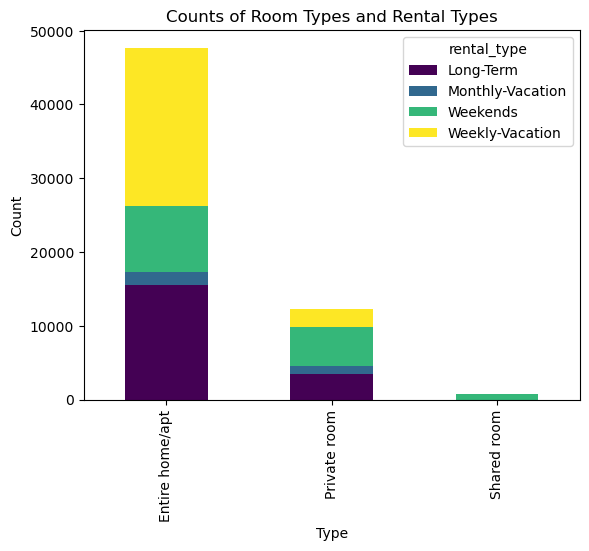

In [35]:
# Grouping and plot for first analysis
room_rental_counts = final_df.groupby(['room_type', 'rental_type']).size().unstack().fillna(0)

# Plot a clustered bar chart
plt.figure(figsize=(10, 6))
room_rental_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Counts of Room Types and Rental Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

After the analysis of the all data, we will discard shared rooms because they are all placed in Friedrischein - Kreuzberg and are specifically for weekends (or 2 days). In this point, we should mention that Berlin goverment allow short-term renting for those which have a license. However, there would be not apply in cases where the listing is a shared-room. 

### Subsetting

In [36]:
# Create df for "rental_type <> 'long-term'" where room_type <> "shared-room"
short_term = final_df[(final_df['rental_type'] != 'Long-Term') & (final_df['room_type'] != 'Shared room')]
short_term.shape

(41018, 42)

## 4.1 Number of listings per neighbourhood for Short Term

In [37]:
# Count listings per neighbourhood_group
listing_counts_ST = short_term.groupby('neighbourhood_group')['id'].count().reset_index() 
listing_counts_ST.columns = ['neighbourhood_group', 'listing_counts']
listing_counts_ST_sorted = listing_counts_ST.sort_values(by='listing_counts', ascending=False)
listing_counts_ST_sorted

,neighbourhood_group,listing_counts
6,Pankow,9504
4,Mitte,9152
1,Friedrichshain-Kreuzberg,7931
9,Tempelhof - Schoeneberg,4927
0,Charlottenburg-Wilm.,3168
5,Neukoelln,3168
10,Treptow - Koepenick,1408
8,Steglitz - Zehlendorf,704
2,Lichtenberg,352
3,Marzahn - Hellersdorf,352


In [38]:
# Create a folium map at a high-level zoom
map_density_ST = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=listing_counts_ST.reset_index(),
    columns=['neighbourhood_group', 'listing_counts'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Listings Density in Short Term Listing'
).add_to(map_density_ST)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(map_density_ST)

# Display the map
map_density_ST


There is no differences between density of listing in short term or short and long term together.

## 4.2 Average Price per neighbourhood for Short Term

In [39]:
# Average Price per neighbourhood_group
price_kiez_ST = short_term.groupby('neighbourhood_group')['price'].mean().reset_index()
price_kiez_ST.columns = ['neighbourhood_group', 'price']
price_kiez_ST_sorted = price_kiez_ST.sort_values(by='price', ascending=False)
price_kiez_ST_sorted

,neighbourhood_group,price
1,Friedrichshain-Kreuzberg,131.634517
4,Mitte,121.981354
6,Pankow,111.426489
2,Lichtenberg,100.000000
9,Tempelhof - Schoeneberg,95.327248
8,Steglitz - Zehlendorf,93.500000
0,Charlottenburg-Wilm.,93.222222
10,Treptow - Koepenick,79.250000
5,Neukoelln,72.111111
3,Marzahn - Hellersdorf,59.000000


In [40]:
# Create a folium map at a high-level zoom
price_map_ST = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=price_kiez_ST,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Average Price Level for Short Term'
).add_to(price_map_ST)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(price_map_ST)

# Display the map
price_map_ST


In [41]:
# Save the map as an HTML file
price_map_ST.save('price_map_ST.html')

We see that on average, the price increased for all the areas except for Steglitz - Zehlendorf. The conclusion is, the long-term listing were having lower prices per night than the short-term ones. Therefore, after dropping the long-term listings, the average price increased. The 50% of the listing in Steglitz - Zehlendorf were long-term listing with high prices (they all are Entire home/apt for >= 2 accommodates). That is the reason why the average price in the full-data analysis was so high.

We can continue denying our hypothesis: "If a neighboughood has more tourist interest, the listing and the price will be high".

## 4.3 Availability per neighbourhood for Short Term

In [42]:
# Average availability per neighbourhood_group
availability_kiez_ST = short_term.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
availability_kiez_ST.columns = ['neighbourhood_group', 'availability_365']
availability_kiez_ST_sorted = availability_kiez_ST.sort_values(by='availability_365', ascending=False)
availability_kiez_ST_sorted

,neighbourhood_group,availability_365
2,Lichtenberg,285.000000
8,Steglitz - Zehlendorf,263.500000
10,Treptow - Koepenick,250.250000
5,Neukoelln,214.222222
9,Tempelhof - Schoeneberg,202.333266
0,Charlottenburg-Wilm.,194.111111
3,Marzahn - Hellersdorf,177.000000
6,Pankow,148.370370
1,Friedrichshain-Kreuzberg,147.306519
4,Mitte,129.961538


In [43]:
# Create a folium map at a high-level zoom
availability_map_ST = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=availability_kiez_ST,
    columns=['neighbourhood_group', 'availability_365'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Availability Level'
).add_to(availability_map_ST)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(availability_map_ST)

# Display the map
availability_map_ST


No significant difference found.

## 4.4 Accommodates per neighbourhood for Short Term

In [44]:
# Average accommodates per neighbourhood_group
accommodates_kiez_ST = short_term.groupby('neighbourhood_group')['accommodates'].mean().reset_index()
accommodates_kiez_ST.columns = ['neighbourhood_group', 'accommodates']
accommodates_kiez_ST_sorted = accommodates_kiez_ST.sort_values(by='accommodates', ascending=False)
accommodates_kiez_ST_sorted

,neighbourhood_group,accommodates
2,Lichtenberg,4.000000
3,Marzahn - Hellersdorf,4.000000
4,Mitte,3.961538
6,Pankow,3.814815
1,Friedrichshain-Kreuzberg,3.733703
9,Tempelhof - Schoeneberg,3.428455
8,Steglitz - Zehlendorf,3.000000
0,Charlottenburg-Wilm.,2.888889
5,Neukoelln,2.888889
10,Treptow - Koepenick,2.750000


In [45]:
# Create a folium map at a high-level zoom
accommodates_map_ST = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Choropleth map
folium.Choropleth(
    geo_data=kiez_geo,
    data=accommodates_kiez_ST,
    columns=['neighbourhood_group', 'accommodates'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Average of Accommodates'
).add_to(accommodates_map_ST)

# Add labels without specific coordinates
for feature in kiez_geo['features']:
    name = feature['properties']['name']
    centroid = [sum(coord[1] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0]),
                sum(coord[0] for coord in feature['geometry']['coordinates'][0][0]) / len(feature['geometry']['coordinates'][0][0])]
    
    label = folium.Popup(name, parse_html=True)
    folium.Marker(
        location=centroid,
        popup=label,
        icon=folium.Icon(color='pink')
    ).add_to(accommodates_map_ST)

# Display the map
accommodates_map_ST


No difference between short term and long term in accomodates found.

# 5. Export Dataframes

In [46]:
# Export short_term as pickel
short_term.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'short_term_3.pkl'))

In [47]:
# Export short_term as xlsx
short_term.to_excel(os.path.join(path, '02 Data','Prepared Data', 'short_term_3.xlsx'))